# Pertanyaan 1

Untuk feature/column '''t1''' & '''wind_speed''', hitung dan beri penjelasan (insight) terkait:

    Titik Pusat Data (Central Tendency)
    Persebaran Data (Dispersion)
    Distribusi Data (Distribution)



In [5]:
# Pertama kita import dulu librarynya. biar gampang semua saya gunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as st
import scipy.stats as stats

from scipy.stats import norm

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
os = SMOTE(random_state=0)

from sklearn.feature_selection import SelectPercentile

from sklearn.ensemble import RandomForestClassifier

import warnings
import pickle

In [7]:
df=pd.read_csv('london_merged.csv')
df.head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0


In [8]:
# kemudian kita lihat datanya seperti apa

In [9]:
df.describe(include='all')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
unique,17414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-05-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,NaN,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,NaN,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,NaN,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000


In [10]:
df.mean()

cnt             1143.101642
t1                12.468091
t2                11.520836
hum               72.324954
wind_speed        15.913063
weather_code       2.722752
is_holiday         0.022051
is_weekend         0.285403
season             1.492075
dtype: float64

In [11]:
df.median()

cnt             844.0
t1               12.5
t2               12.5
hum              74.5
wind_speed       15.0
weather_code      2.0
is_holiday        0.0
is_weekend        0.0
season            1.0
dtype: float64

In [12]:
df.mode()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,46.0,13.0,13.0,88.0,12.0,1.0,0.0,0.0,0.0
1,2015-01-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17410,2017-01-03 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17411,2017-01-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17412,2017-01-03 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [14]:
for i in ['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season']:
       print(df[i].value_counts())

46      46
53      39
70      36
33      36
120     36
        ..
3590     1
1559     1
3670     1
3718     1
0        1
Name: cnt, Length: 3781, dtype: int64
 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 31.000000      3
 31.500000      3
 34.000000      2
 10.333333      1
-1.500000       1
Name: t1, Length: 73, dtype: int64
 13.000000    969
 12.000000    821
 14.000000    802
 11.000000    774
 16.000000    729
             ... 
 33.000000      2
 10.333333      1
-5.500000       1
-6.000000       1
-5.000000       1
Name: t2, Length: 82, dtype: int64
88.0    965
82.0    928
77.0    774
87.0    710
76.0    513
       ... 
24.0      1
23.0      1
86.5      1
26.5      1
89.5      1
Name: hum, Length: 143, dtype: int64
12.000000    842
11.000000    832
14.000000    832
15.000000    828
13.000000    828
            ... 
36.500000      1
47.500000      1
13.500000      1
2.666667       1
35.500000      1
Name: wind_speed, L

# koment
* dari data diatas, kita bisa lihat bahwa data outlier terlihat melalui kolom cnt, t1, t2, hum, wind_speed
* weather code, is holiday, is weekend, season merupakan data kategorikal 
* rata2 temperatur asli t1 sekitar 12.4 derajat celcius
* rata2 kelembaban udara berada di angka 72%
* rata2 kecepatan udara sekitar 15km/jam
* mayoritas windspeed berkisar sekitar 1km/jam
* bike share mayoritas terjadi pada cuaca 'Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity'
* bike share mayoritas terjadi ketika bukan masa holiday
* bike share mayoritas terjadi ketika bukan hari weekend

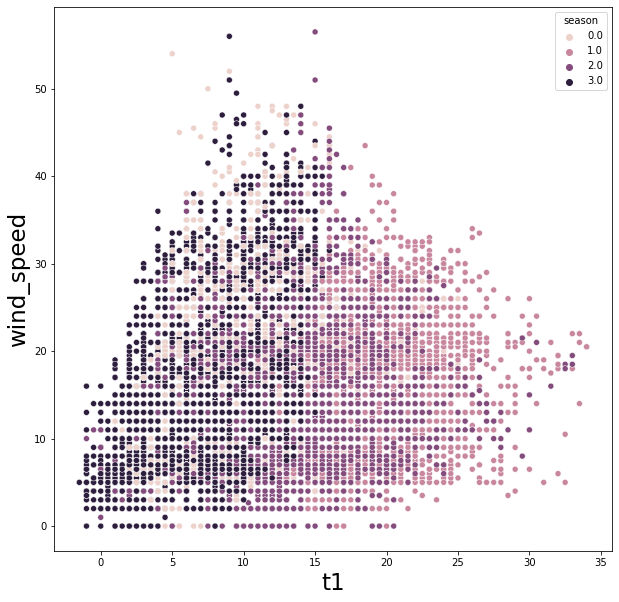

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 't1', y= 'wind_speed', data=df, hue='season')
plt.xlabel('t1', fontsize=23)
plt.ylabel('wind_speed', fontsize=23)
plt.savefig('1')

# komen
* bisa kita lihat bahwa pada season winter, temperatur aslinya itu dibawah 15 derajat celcius, dengan persebaran wind speednya 0-40 km/jam 
* sedangkan pada season spring & summer, temperatur aslinya berada diatas 15 derajat celcius, dengan persebaran wind speed 0-30 km/jam

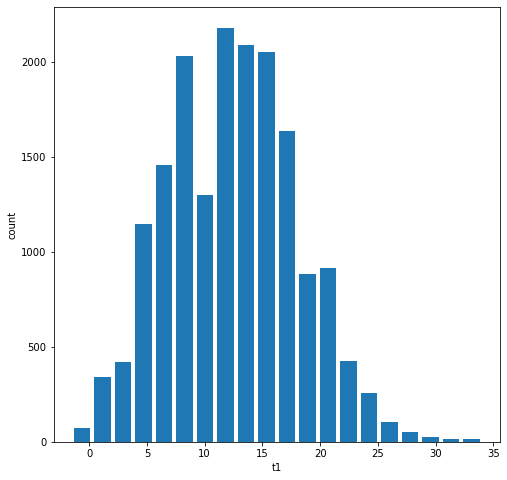

In [17]:
plt.figure(figsize=(8,8))
plt.hist(df.t1, bins=20, rwidth=0.8)
plt.xlabel('t1')
plt.ylabel('count')
plt.savefig('2')

In [80]:
# distribusi data countnya normal, sedikit skew ke kanan

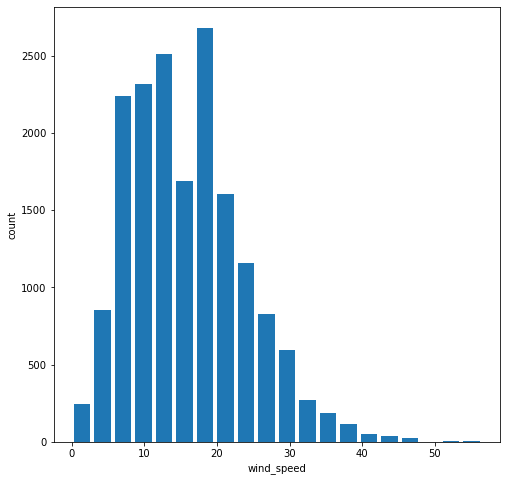

In [18]:
plt.figure(figsize=(8,8))
plt.hist(df.wind_speed, bins=20, rwidth=0.8)
plt.xlabel('wind_speed')
plt.ylabel('count')
plt.savefig('3')

In [81]:
# distribusi windspeednya skew ke kanan

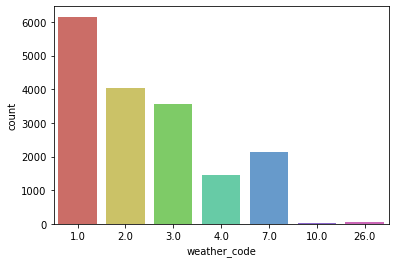

<Figure size 432x288 with 0 Axes>

In [19]:
sns.countplot(x='weather_code', data=df, palette='hls')
plt.show()
plt.savefig('4')

In [ ]:
# mayoritas orang meminjam sepeda ketika cuacanya cerah

# Pertanyaan 2

Carilah data outlier dan beri penjelasan (insight) pada feature/column hum! Tambahkan plot untuk menampilkan adanya data outlier!

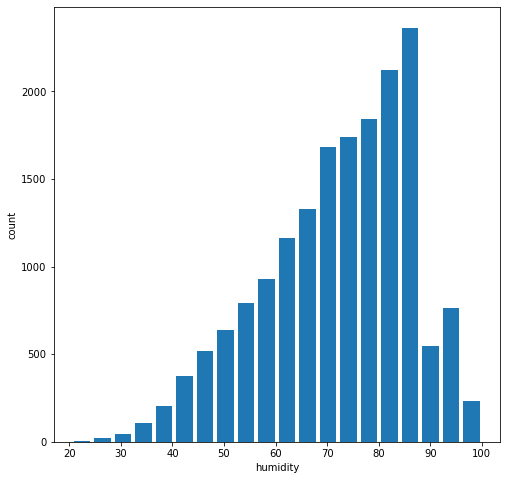

In [20]:
plt.figure(figsize=(8,8))
plt.hist(df.hum, bins=20, rwidth=0.8)
plt.xlabel('humidity')
plt.ylabel('count')
plt.savefig('5')

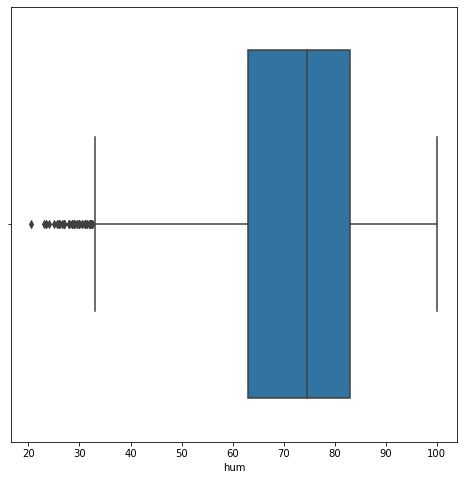

In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='hum')
plt.savefig('6')

# komen
* bisa kita lihat bahwa outliernya berada disebelah kiri, yang mana dapat kita sebut sebagai left skew.
* data outlier berada ketika humidity dibawah 30%

# Pertanyaan 3

Tampilkan plot yang tepat untuk melihat pengaruh is_holiday dan is_weekend terhadap rata-rata jumlah sepeda (cnt) yang dipinjam?
Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

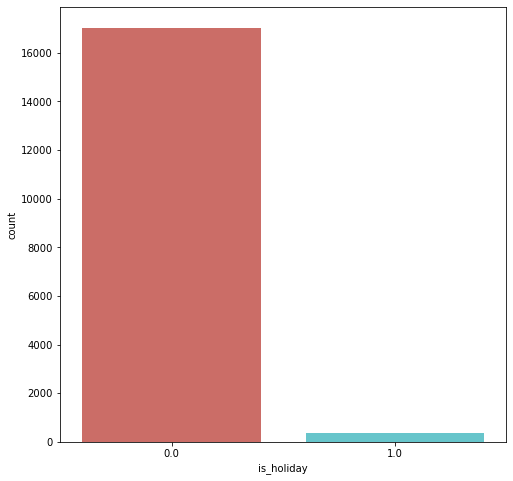

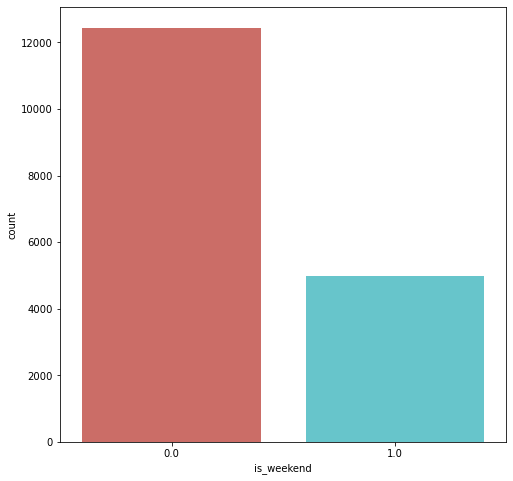

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(x='is_holiday', data=df, palette='hls')
plt.show()


plt.figure(figsize=(8,8))
sns.countplot(x='is_weekend', data=df, palette='hls')
plt.show()

# Pertanyaan 4

Di antara hum, wind_speed, & t1, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column cnt? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk penyelenggara/peminjam sepeda?

In [46]:
df[['cnt', 'hum']].corr(method='spearman')

,cnt,hum
cnt,1.000000,-0.504613
hum,-0.504613,1.000000


In [47]:
df[['cnt', 'wind_speed']].corr(method='spearman')

,cnt,wind_speed
cnt,1.000000,0.181434
wind_speed,0.181434,1.000000


In [48]:
df[['cnt', 't1']].corr(method='spearman')

,cnt,t1
cnt,1.000000,0.392384
t1,0.392384,1.000000


# komen
* dapat kita lihat bahwa hum berkorelasi negatif terhadap cnt, artinya semakin tinggi humidity, maka bike share akan semakin rendah
* kemudian kita dapat lihat bahwa wind speed dan temperatur berkorelasi positif dengan cnt. artinya semakin tinggi windspeed maupun temperatur, maka bike share akan semakin meningkat pula

# Pertanyaan 5


    Cari dan tampilkan visualisasinya!

    Musim (season) yang jumlah pemimjaman sepedanya (cnt)nya paling tinggi, lalu tampilkan jumlah peminjaman sepeda berdasarkan musimnya.
    Cuaca(weather_code) dengan rata-rata peminjaman sepeda paling rendah, lalu tampilkan rata-rata peminjaman sepeda berdasarkan cuacanya.


In [65]:
df.groupby('season')['cnt'].count()


season
0.0    4394
1.0    4387
2.0    4303
3.0    4330
Name: cnt, dtype: int64

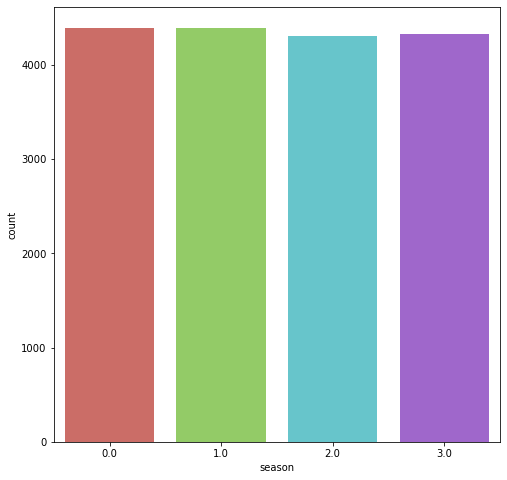

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(x='season', data=df, palette='hls')
plt.show()

# komen
* bisa dilihat bahwa peminjaman sepeda hampir sama jumlahnya di setiap season, namun season spring melebihi yg lainnya, dengan jumlah peminjaman sekitar 4393 peminjam

In [68]:
df.groupby('weather_code')['cnt'].count()


weather_code
1.0     6150
2.0     4034
3.0     3551
4.0     1464
7.0     2141
10.0      14
26.0      60
Name: cnt, dtype: int64

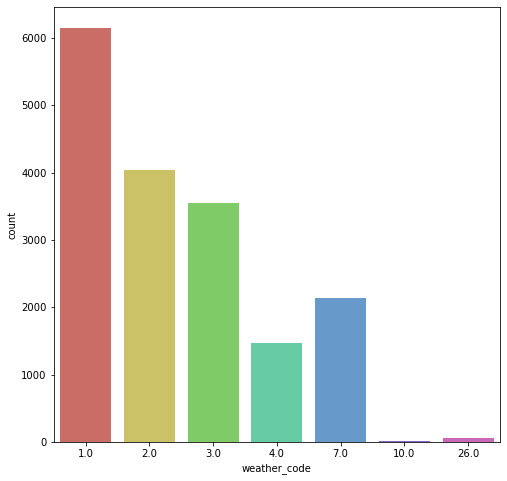

In [69]:
plt.figure(figsize=(8,8))
sns.countplot(x='weather_code', data=df, palette='hls')
plt.show()

# komen
* rata-rata peminjaman sepeda paling rendah berada ketika weathernya sedang berada adalam posisi snowfall (hujan salju)


# pertanyaan 6

Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan jumlah peminjaman sepeda (cnt) berdasarkan cuaca (weather_code)!

In [79]:
df.groupby('weather_code')['cnt'].count()

weather_code
1.0     6150
2.0     4034
3.0     3551
4.0     1464
7.0     2141
10.0      14
26.0      60
Name: cnt, dtype: int64